<a href="https://colab.research.google.com/github/aleksejalex/PyPEF/blob/main/PyPEF_07_data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyPEF, lecture 07. Pictures in Python (recap of the video). Data in Python (part 2).

Prepared by: Aleksej Gaj ( pythonforstudents24@gmail.com )

🔗 Course website: [https://aleksejalex.4fan.cz/pef_python/](https://aleksejalex.4fan.cz/pef_python/)


In this tutorial we will
 - recall basics of image manipulation in Python, namely:
    - how to open image in Python and what it looks like
    - how to access pixels
    - how to work with color channels
    - some other examples
 - continue to work with data in Python and get familiar with:
    - advanced plotting (library seaborn)
    - more of pandas functionality
    - practice understanding of data

In [2]:
# imports for today (we are already familiar with those libraries)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Images in Python (OpenCV package)
**(based on video and materials by freeCodeCamp: [here](https://www.youtube.com/watch?v=P4Z8_qe2Cu0))**

<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/OpenCV_Logo_with_text.png" alt="logo" width="160">

 - package for working with images and generally for **real-time computer vision** tasks
 - = *Open Source Computer Vision Library*
 - originally developed by Intel, later supported by Willow Garage, then Itseez (which was later acquired by Intel)
 - cross-platform & licensed as free and open-source software under Apache License 2
 - Starting in 2011, OpenCV features GPU acceleration for real-time operations

 (The OpenCV logo is composed of the 3 capital letters O, C, V arranged in a triangle. The logo combines several motifs in the spirit of Open Source and Computer Vision.)

Link to webpage of OpenCV:  [https://opencv.org/](https://opencv.org/).

📜 Technical note: naming of this library is a little tricky:
 - if you need to install this library via terminal/pip, you use `pip3 install opencv-python`
 - when importing, you use `import cv2`

In [3]:
# install opencv:
%pip install opencv-python

In [4]:
# import of library
import cv2 as cv

In [5]:
# download the images we plan to work with:
import requests

url = "https://aleksejalex.4fan.cz/pef_python/img/pef.png"
url2 = "https://aleksejalex.4fan.cz/pef_python/img/red_rat.jpg"

destination = "pef.png"

response = requests.get(url)

if response.status_code == 200:
    with open(destination, 'wb') as f:
        f.write(response.content)
    print("File downloaded successfully.")
else:
    print("Failed to download the file. Status code:", response.status_code)


File downloaded successfully.


In [6]:
# load image from file and show it:
img = cv.imread("red_rat.jpg")
img = cv.imread("pef.png")

In [7]:
## This is working in script, but not in jupyter environment!!!
#cv.imshow("Image", img)
#cv.waitKey(0)
#cv.destroyAllWindows()

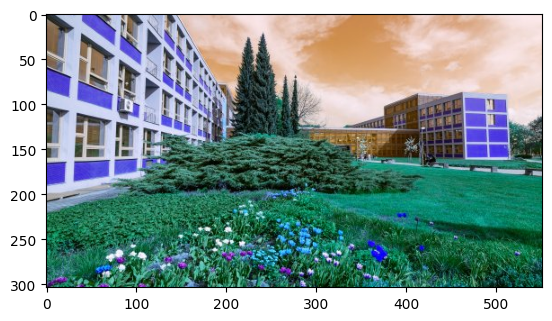

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(img)
plt.show()

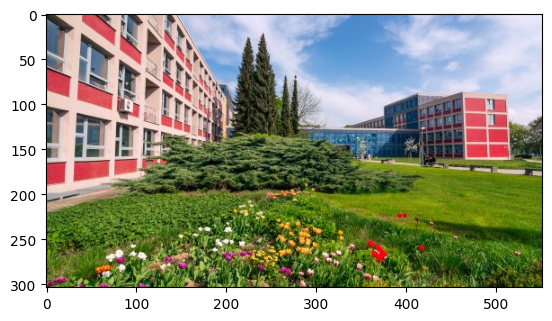

In [9]:
img_converted_to_RGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img_converted_to_RGB)
plt.show()

In [10]:
def convert_bgr_to_rgb(img):
    """converts image from BGR (used by opencv) to RGB (used by matplotlib)"""
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [11]:
rat_rgb = convert_bgr_to_rgb(img)

In [12]:
type(img)

numpy.ndarray

In [13]:
img.shape

(304, 552, 3)

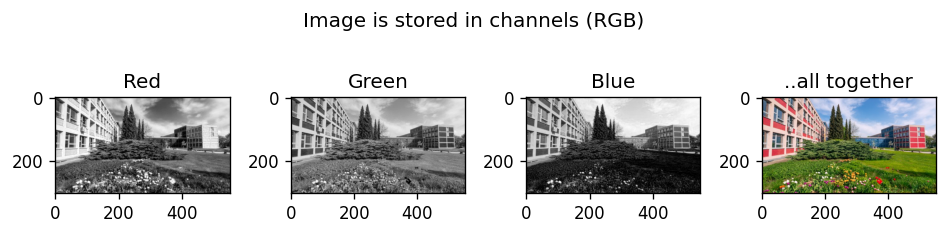

In [14]:
plt.figure(figsize=(8,2), dpi=120)
plt.subplot(1,4,1)
plt.imshow(rat_rgb[:,:,0], cmap='gray')
plt.title('Red')
plt.subplot(1,4,2)
plt.imshow(rat_rgb[:,:,1], cmap='gray')
plt.title('Green')
plt.subplot(1,4,3)
plt.imshow(rat_rgb[:,:,2], cmap='gray')
plt.title('Blue')
plt.subplot(1,4,4)
plt.imshow(rat_rgb[:,:,:])
plt.title('..all together')

plt.suptitle("Image is stored in channels (RGB)")
plt.tight_layout()
plt.show()

### Image by pixels (one more time)

In [15]:
myimg = np.zeros([10,10], dtype=int)
myimg

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

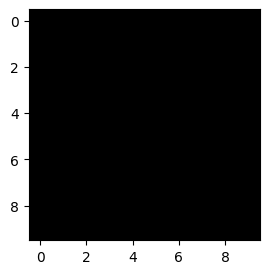

In [16]:
plt.figure(figsize=(3,3))
plt.imshow(myimg, cmap='gray')
plt.show()

In [17]:
myimg[1:5,1:5] = 1
myimg[5:9,5:9] = 1
myimg

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

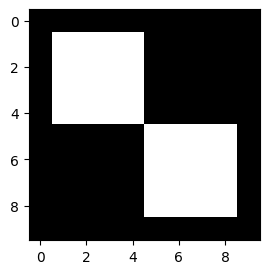

In [18]:
plt.figure(figsize=(3,3))
plt.imshow(myimg, cmap='gray')
plt.show()

In [19]:
np.zeros((2,3,4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [20]:
np.zeros((4,2,3))

array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]]])

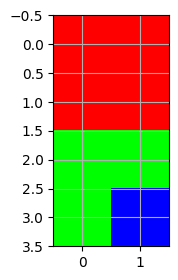

In [21]:
# Create an empty array with shape (10, 10, 3)
image = np.zeros((4, 2, 3), dtype=int)

# Set different colors for different regions of the image
image[:2, :] = [255, 0, 0]    # Red in the left half
image[2:, :] = [0, 255, 0]    # Green in the right half
image[3, 1]  = [0, 0, 255]    # one blue pixel

plt.figure(figsize=(3,3))
plt.imshow(image)
plt.grid()
plt.show()

### 🚀 Bonus: encryptor

 - here: [https://gist.github.com/aleksejalex/1dad3b249ee314f908707a901c1754d7](https://gist.github.com/aleksejalex/1dad3b249ee314f908707a901c1754d7)



## Now back to data: recall last time

In [22]:
url_to_data = "https://gist.githubusercontent.com/aleksejalex/26a83646c03120af1eaeb117572d895e/raw/2ddc8661d86fbf1b7d09204ff39fdf74ce3723b6/cereals.csv"

df_cereals = pd.read_csv(url_to_data, delimiter=',')
df_cereals.head()

,name,mfr,type_of,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [23]:
df_cereals["calories"] = df_cereals["calories"].astype('float')
df_cereals["type_of"] = df_cereals["type_of"].astype("category")
df_cereals.dtypes

name          object
mfr           object
type_of     category
calories     float64
protein        int64
fat            int64
sodium         int64
fiber        float64
carbo        float64
sugars         int64
potass         int64
vitamins       int64
shelf          int64
weight       float64
cups         float64
rating       float64
dtype: object

In [24]:
df_cereals.describe(include='all')

,name,mfr,type_of,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,100% Bran,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392


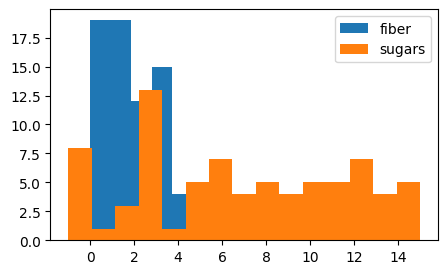

In [25]:
plt.figure(figsize=(5,3))
plt.hist(df_cereals['fiber'], bins=15, label="fiber")
plt.hist(df_cereals['sugars'], bins=15, label="sugars")
plt.legend()
plt.show()

The graph (plotted via Matplotlib) shows everything we need, but... is there a way to *simply* plot same images but looking *more modern*? 🤔

Of course there is:

## Seaborn
<a href="https://seaborn.pydata.org/"><img src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg" alt="banner" width="380" align="right"></a>
 = library for high-level visualisation
 - based on matplotlib (great!)
 - "a high level API for statistical visualisation"
 - homepage: [here](https://seaborn.pydata.org/)


In [26]:
import seaborn as sns

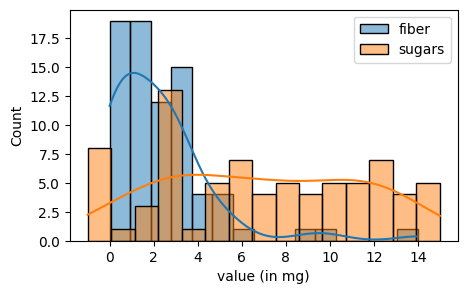

In [27]:
plt.figure(figsize=(5,3))
sns.histplot(data=df_cereals['fiber'], bins=15, kde=True, label="fiber")
sns.histplot(data=df_cereals['sugars'], bins=15, kde=True, label="sugars")
plt.xlabel("value (in mg)")
plt.legend()
plt.show()

### Let's move on to different dataset:
We will have a look on very famous 'iris' dataset, [some notes about it](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [28]:
df_iris = sns.load_dataset('iris')

df_iris.head(8)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa


<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.integratedots.com%2Fwp-content%2Fuploads%2F2019%2F06%2Firis_petal-sepal-e1560211020463.png&f=1&nofb=1&ipt=db4bab5b341bab9c097c2f4f974becf8c756a2ee4d80d1ef38153a8ed583e6c7&ipo=images" alt="banner" width="400" align="center">

([image source](https://www.integratedots.com/determine-number-of-iris-species-with-k-means/))

In [29]:
df_iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Dataset contains 150 observations of iris flowers. The parameters measured were lengths and widths, the "response" variable was the only categorical one present in this dataset: the name of species of the observed flower (3 possible values).

In [30]:
df_iris["species"] = df_iris["species"].astype("category")

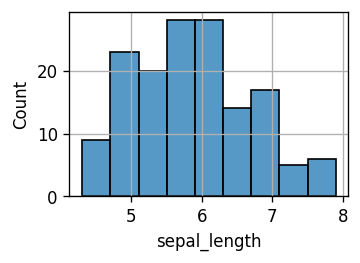

In [31]:
plt.figure(figsize=(3,2), dpi=120)
sns.histplot(data=df_iris['sepal_length'])
plt.grid()
plt.show()

📈 3d picture of the dataset --> separate script

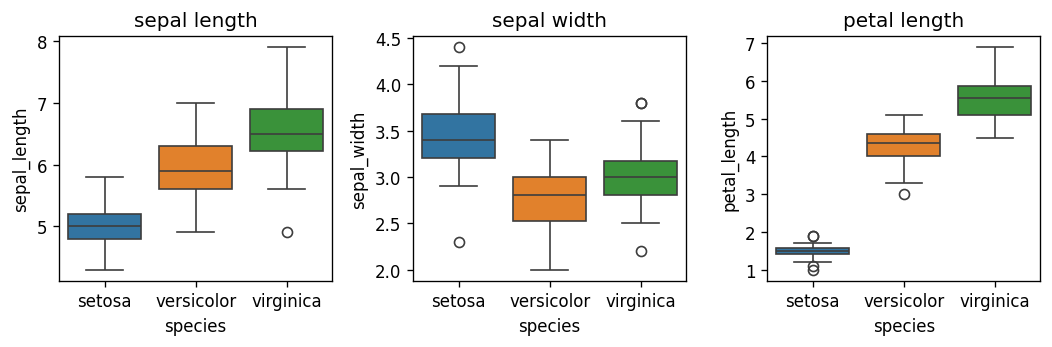

In [32]:
plt.figure(figsize=(9,3), dpi=120)
plt.subplot(1,3,1)
sns.boxplot(x='species', y='sepal_length', data=df_iris, hue='species')
plt.title("sepal length")
plt.subplot(1,3,2)
sns.boxplot(x='species', y='sepal_width', data=df_iris, hue='species')
plt.title("sepal width")
plt.subplot(1,3,3)
sns.boxplot(x='species', y='petal_length', data=df_iris, hue='species')
plt.title("petal length")
plt.tight_layout()
plt.show()

❓ What does this image tell us?

**Boxplot:** basic visualisation tool for dataset
![ima](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.sharpsightlabs.com%2Fwp-content%2Fuploads%2F2019%2F11%2Fboxplot-simple-explanation.png&f=1&nofb=1&ipt=3f329f8ea83e1d89a24bb4bac240ba2b6596c69184886fd238d1adf20d6ebe13&ipo=images)

([image source](https://www.sharpsightlabs.com/blog/seaborn-boxplot/))

### PairPlot - first impression of the dataset

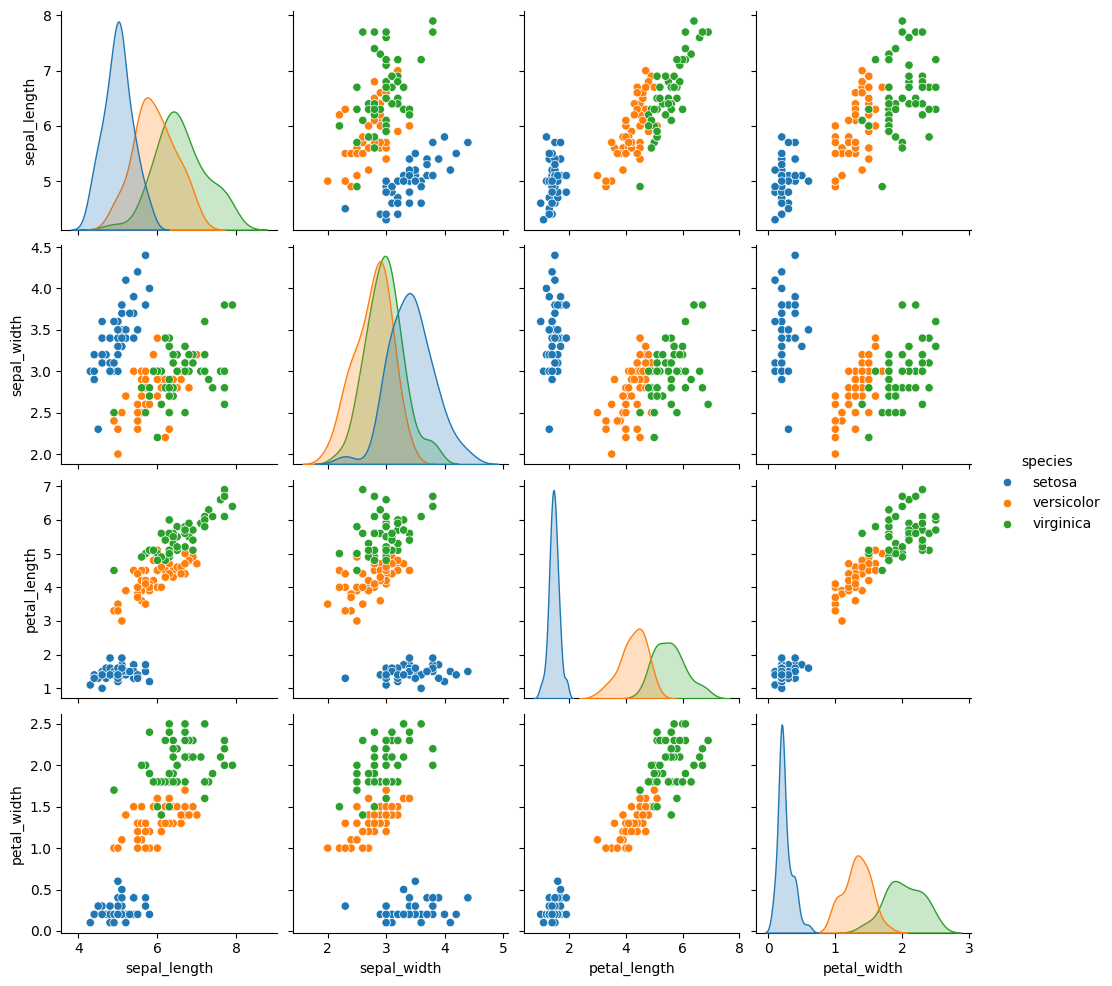

In [33]:
sns.pairplot(data=df_iris, hue='species')
plt.show()

### visualise statistical relationship

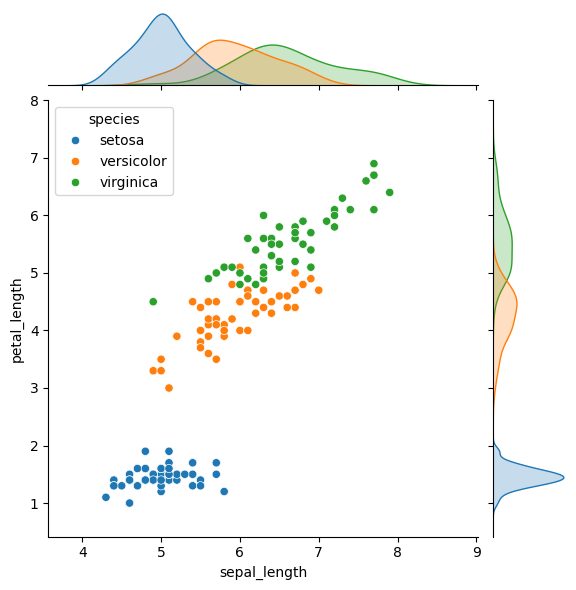

In [34]:
sns.jointplot(x="sepal_length", y="petal_length", data=df_iris, hue = 'species')

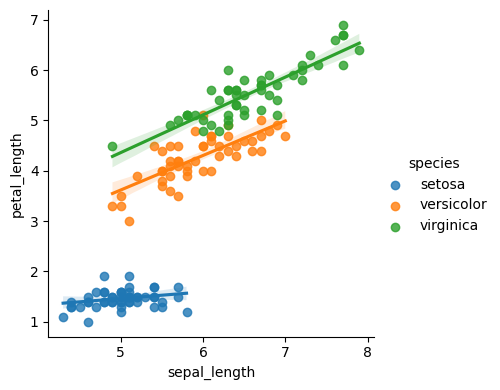

In [35]:
sns.lmplot(data=df_iris, x="sepal_length", y="petal_length", hue="species", height=4)

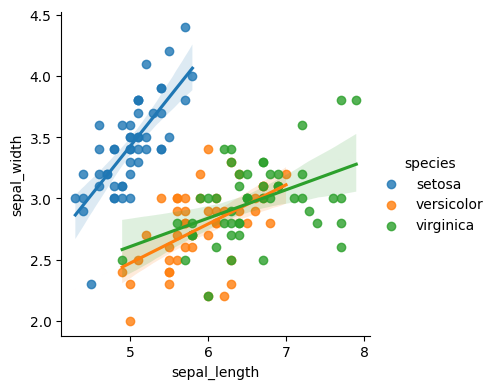

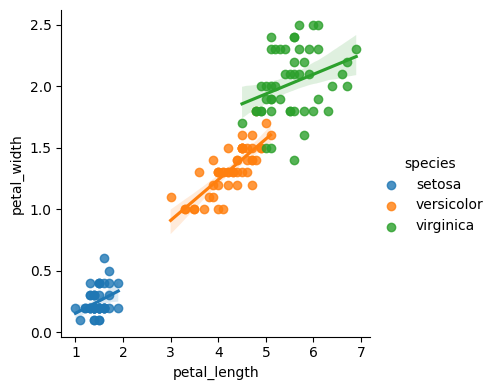

In [36]:
sns.lmplot(data=df_iris, x="sepal_length", y="sepal_width", hue="species", height=4)
sns.lmplot(data=df_iris, x="petal_length", y="petal_width", hue="species", height=4)

Based on two last plots we see that:
 - length of sepal and petal correlates  (the bigger is one, the bigger you can expect the other one)
 - length and width of petal has much less correlation (still true)

### Gallery of possibilities:
[https://seaborn.pydata.org/examples/index.html](https://seaborn.pydata.org/examples/index.html)

### to conclude:
Dataset iris is simple but not very intuitive. As we have seen, it is suitable for classification task, i.e. based on dimensions of sepal and petal predict the species of the iris.            **=> next time**

## Your time: Titanic

**task:** get your own feeling of "unknown" data - *the Titanic dataset*

Description from [kaggle](https://www.kaggle.com/datasets/vinicius150987/titanic3/code):

>The sinking of the Titanic is one of the most infamous shipwrecks in history.
>
>On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
>
>While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
>
>In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


In [37]:
df_titanic = sns.load_dataset('titanic')

In [38]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
df_titanic['town_num'] = pd.factorize(df_titanic['embark_town'])[0] + 1
df_titanic['alive'] = pd.factorize(df_titanic['alive'])[0] + 1

In [40]:
df_titanic.town_num

0      1
1      2
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    2
890    3
Name: town_num, Length: 891, dtype: int64

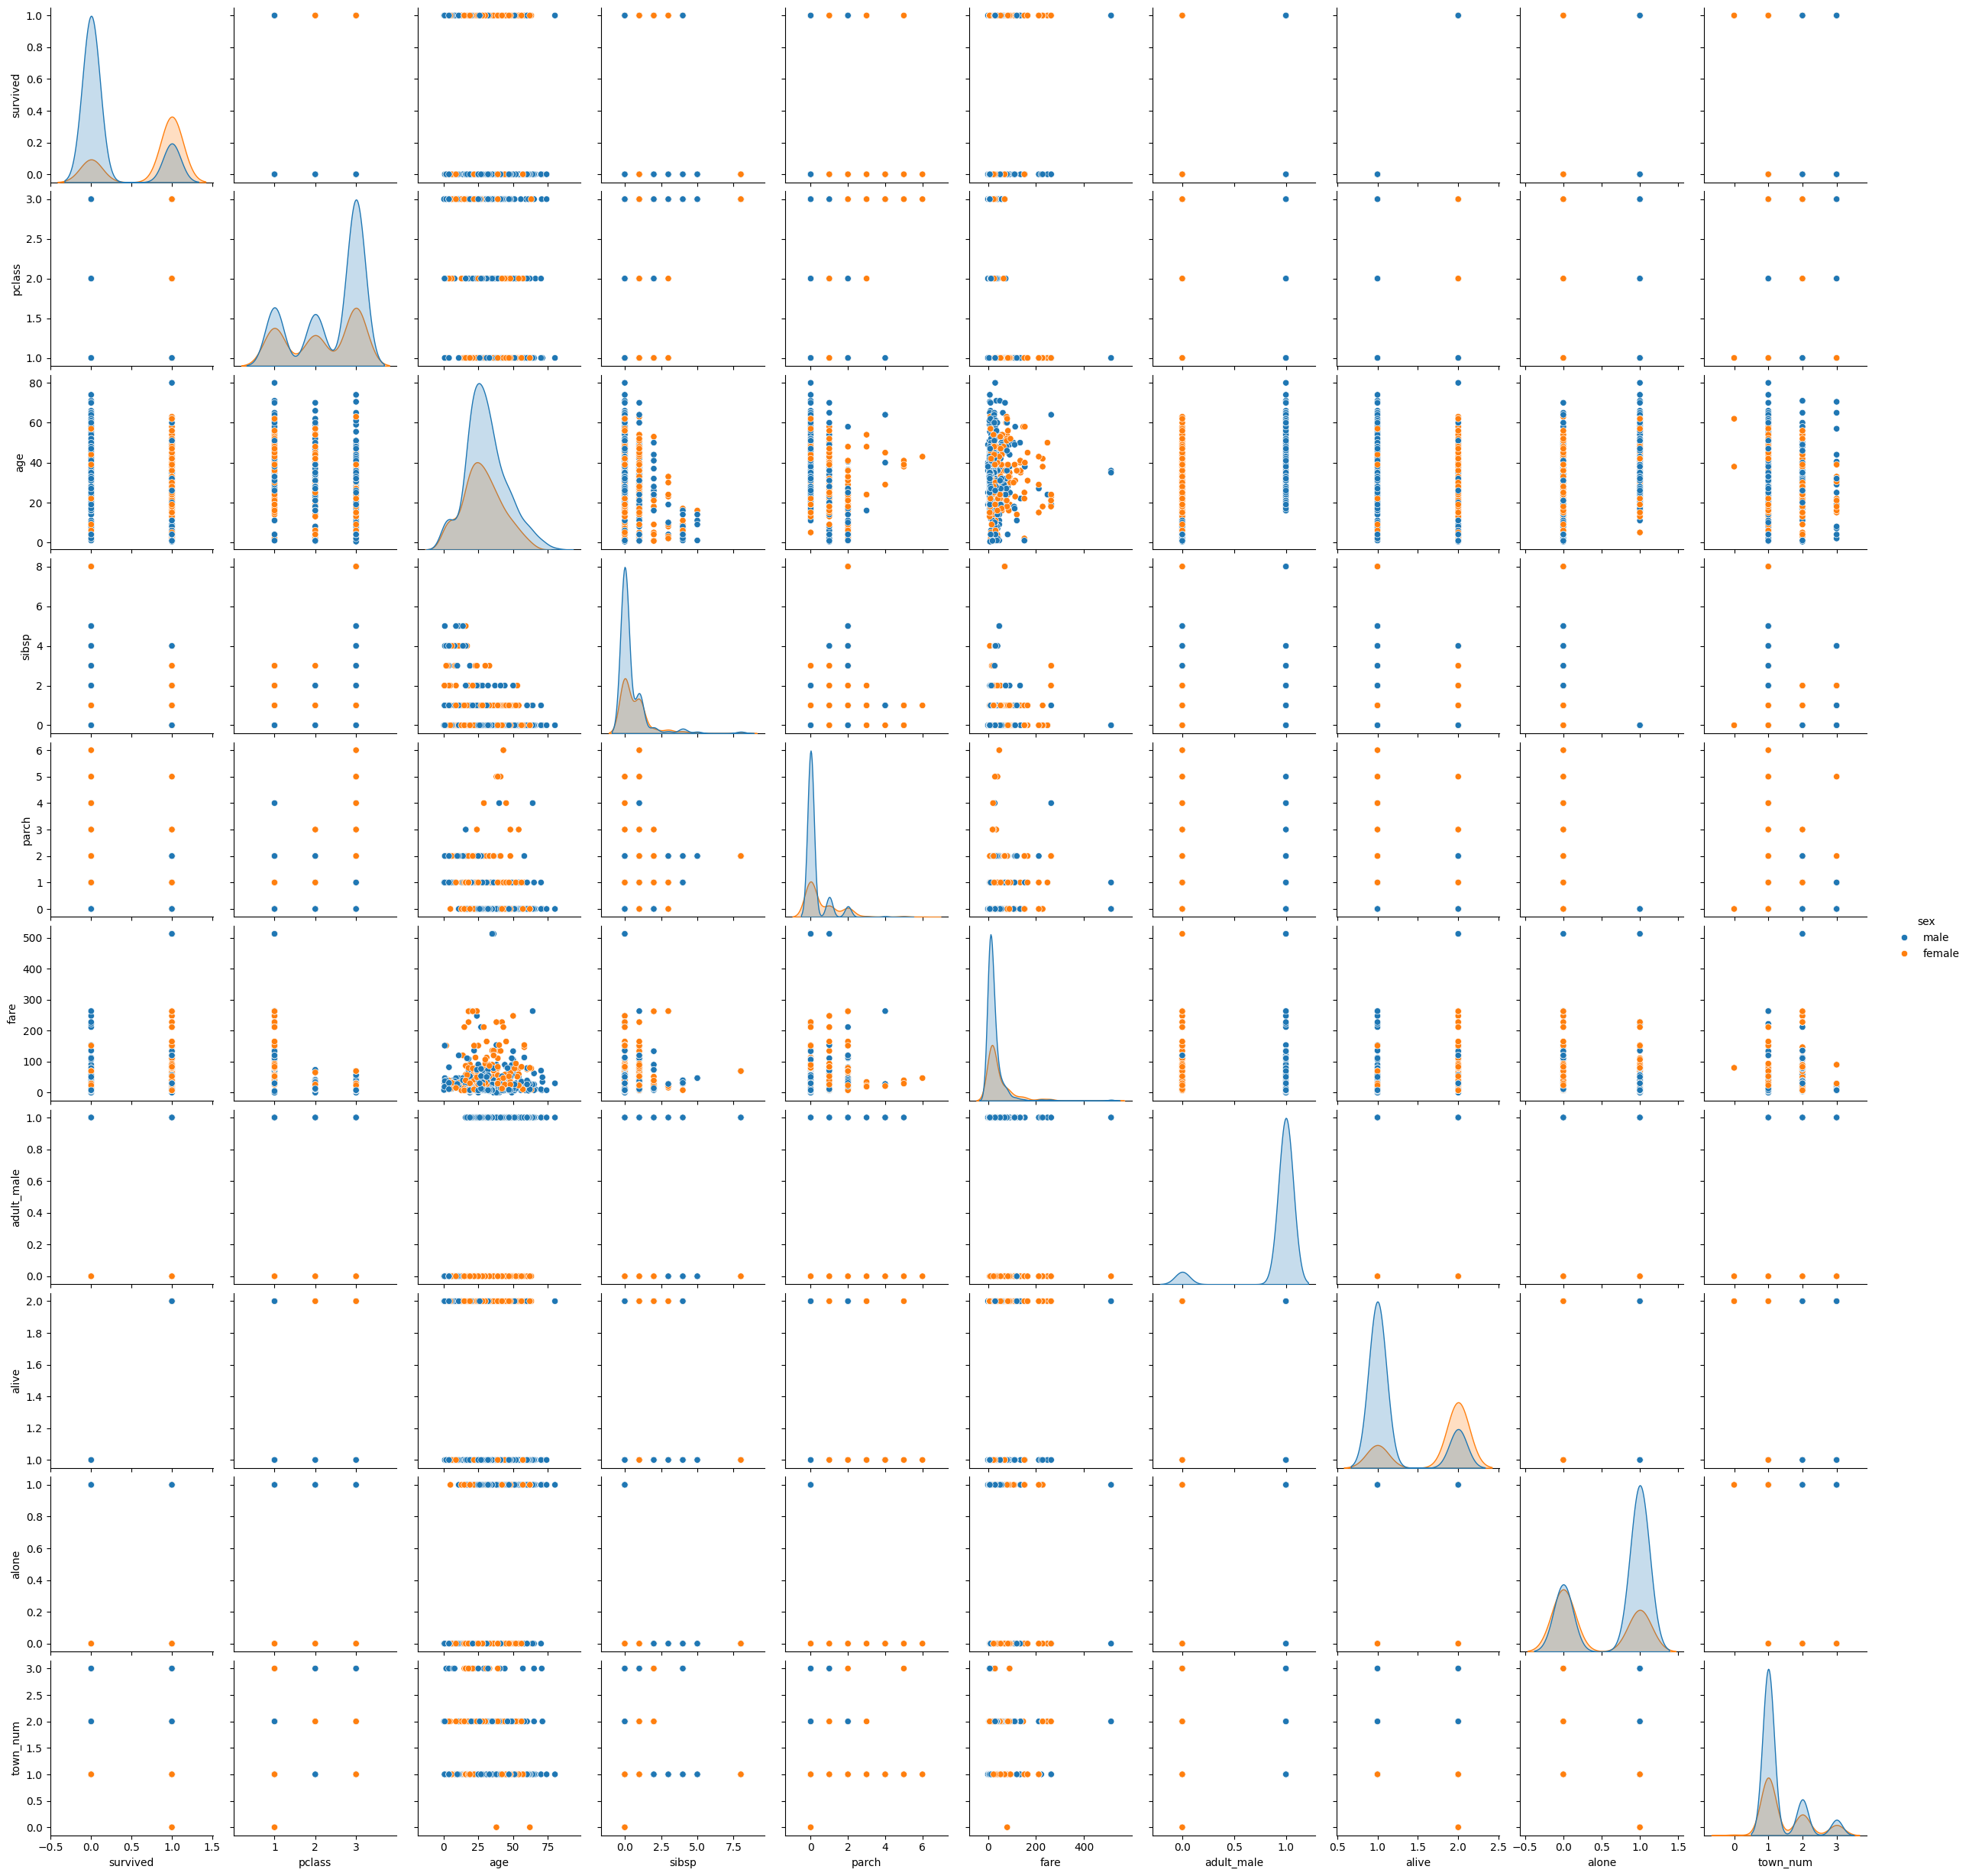

In [41]:
sns.pairplot(df_titanic, hue='sex')

In [42]:
df_titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive             int64
alone              bool
town_num          int64
dtype: object

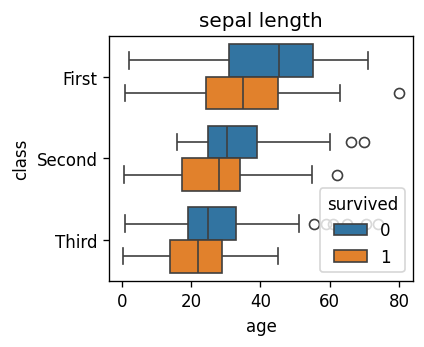

In [43]:
plt.figure(figsize=(9,3), dpi=120)
plt.subplot(1,3,1)
sns.boxplot(x='age', y='class', data=df_titanic, hue='survived')
plt.title("sepal length")

plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='Count'>

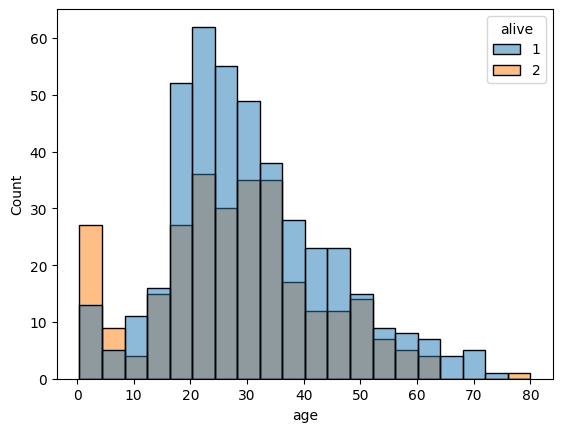

In [44]:
sns.histplot(data=df_titanic, x = 'age', hue='alive', palette='tab10')

<Axes: xlabel='town_num', ylabel='Count'>

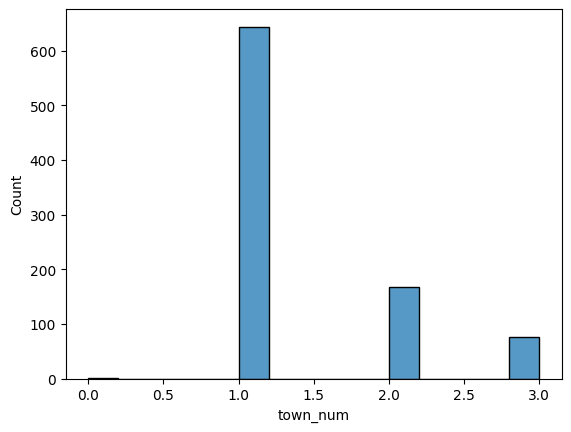

In [45]:
sns.histplot(data=df_titanic['town_num'])